In [ ]:
import os
import pandas as pd

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
DATA_DIR = os.path.join(BASE_DIR, "databasis")


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\data4.csv",sep=",")
data_Final = pd.read_csv(r"C:\Users\ethan\OneDrive\Documents\Aivancity\Cours\Clinique de l'IA\Projet_1\projet4_datasets\data_FINAL.csv",sep=",")

In [7]:
data.drop(columns="Unnamed: 0",inplace=True)
data_Final.drop(columns="Unnamed: 0",inplace=True)

# Step 1

Voir où sont les données abérantes et ensuite associer à la région qui est à le plus de données abérantes.

In [12]:
data_Final.shape

(1980288, 16)

In [14]:
data.columns

Index(['region', 'Date', 'Heure', 'Date - Heure', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
       'TCO Bioénergies (%)', 'TCH Bioénergies (%)', 'Total', 'tmoy'],
      dtype='object')

In [16]:
data[:2]

region        Date  Heure               Date - Heure  Consommation (MW)  \
0  Grand Est  2021-01-11  14:00  2021-01-11T14:00:00+01:00             7403.0   
1  Grand Est  2021-01-11  23:00  2021-01-11T23:00:00+01:00             6544.0   

   Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
0          2227.0          9175.0        356.0         227.0   
1          2148.0          9127.0       1963.0           0.0   

   Hydraulique (MW)  ...  TCO Eolien (%)  TCH Eolien (%)  TCO Solaire (%)  \
0             554.0  ...            7.48           23.99             1.58   
1             525.0  ...            8.02           22.74             1.80   

   TCH Solaire (%)  TCO Hydraulique (%)  TCH Hydraulique (%)  \
0            48.55                  NaN                  NaN   
1            48.96                  NaN                  NaN   

   TCO Bioénergies (%)  TCH Bioénergies (%)         Total       tmoy  
0                  NaN                  NaN  5.572013e+06  11.448234  
1                  NaN                  NaN  5.572013e+06  11.448234  

[2 rows x 31 columns]

In [18]:
data_Final.columns

Index(['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

In [20]:
data_Final[:2]

region        Date  Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
0  Grand Est  2021-01-11             7403.0          2227.0          9175.0   
1  Grand Est  2021-01-11             6544.0          2148.0          9127.0   

   Eolien (MW)  Solaire (MW)  Hydraulique (MW)  Bioénergies (MW)  \
0        356.0         227.0             554.0             117.0   
1       1963.0           0.0             525.0             118.0   

   TCO Nucléaire (%)  TCO Eolien (%)  TCO Solaire (%)  TCO Hydraulique (%)  \
0               3.07            7.48             1.58                  NaN   
1               0.00            8.02             1.80                  NaN   

   TCO Bioénergies (%)         Total       tmoy  
0                  NaN  5.572013e+06  11.448234  
1                  NaN  5.572013e+06  11.448234

## Valeurs abérantes sur le TCO nucléaire

Pour data_Final

<Axes: >

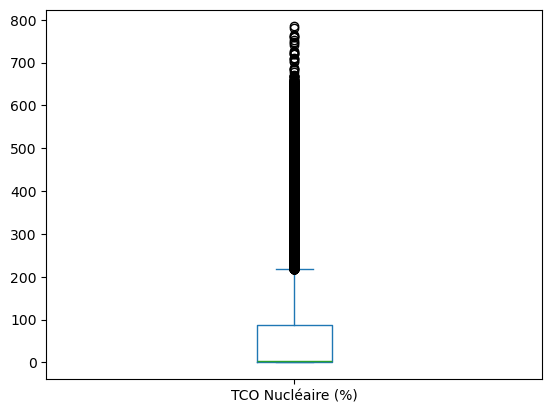

In [24]:
data_Final["TCO Nucléaire (%)"].plot(kind='box')

In [26]:
#d_F_TCO_Nucl == Data frame TCO Nucléaire

In [28]:
d_F_TCO_Nucl = data_Final["TCO Nucléaire (%)"]
d_F_TCO_Nucl.shape

(1980288,)

In [30]:
d_F_TCO_Nucl_Q1 = d_F_TCO_Nucl.quantile(0.25)
d_F_TCO_Nucl_Q3 = d_F_TCO_Nucl.quantile(0.75)
d_F_TCO_Nucl_IQR=d_F_TCO_Nucl_Q3-d_F_TCO_Nucl_Q1

In [32]:
d_F_TCO_Nucl_D1 = d_F_TCO_Nucl_Q1 - 1.5*d_F_TCO_Nucl_IQR                       #Valeurs abérante < d_F_TCO_Nucl_D1
d_F_TCO_Nucl_D3 = d_F_TCO_Nucl_Q3 + 1.5*d_F_TCO_Nucl_IQR                       #Valeurs abérante > d_F_TCO_Nucl_D3

In [34]:
d_F_TCO_Nucl_Outlayers = data_Final[
    (d_F_TCO_Nucl >= d_F_TCO_Nucl_D3) |
    (d_F_TCO_Nucl <= d_F_TCO_Nucl_D1)
]

In [36]:
d_F_TCO_Nucl_Outlayers.shape[0]

23084

In [38]:
d_F_TCO_Nucl_Outlayers_region_counts = d_F_TCO_Nucl_Outlayers['region'].value_counts()

In [40]:
d_F_TCO_Nucl_Outlayers_region_counts

region
Centre-Val de Loire    21404
Normandie               1263
Grand Est                417
Name: count, dtype: int64

## Enregistrer graphique

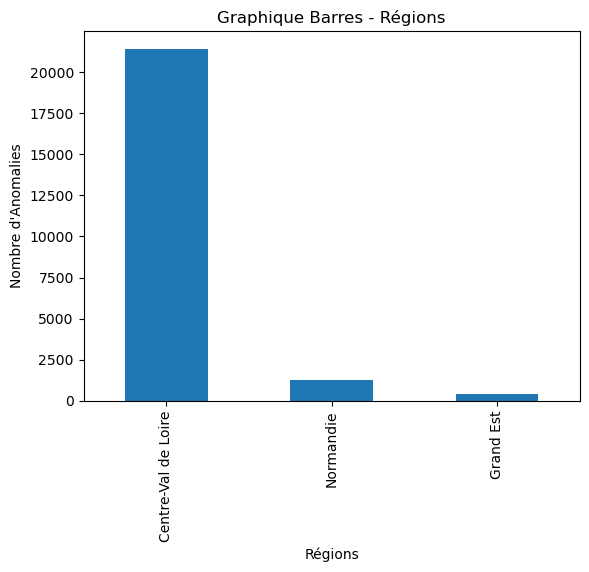

In [46]:
# Affichage du graphique
ax = d_F_TCO_Nucl_Outlayers_region_counts.plot.bar()

# Titre et légendes (optionnel)
plt.title("Graphique Barres - Régions")
plt.xlabel("Régions")
plt.ylabel("Nombre d'Anomalies")

# Enregistrer le graphique
plt.savefig("graphique_barres_regions.png", dpi=300, bbox_inches='tight')  # Enregistrer en PNG

# Afficher le graphique
plt.show()


<Axes: xlabel='region'>

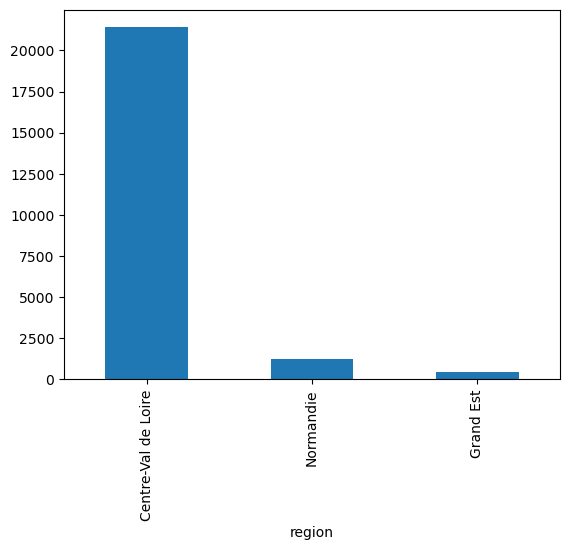

In [48]:
d_F_TCO_Nucl_Outlayers_region_counts.plot.bar()

## Valeurs abérantes sur le consommation

Pour data_Final

<Axes: >

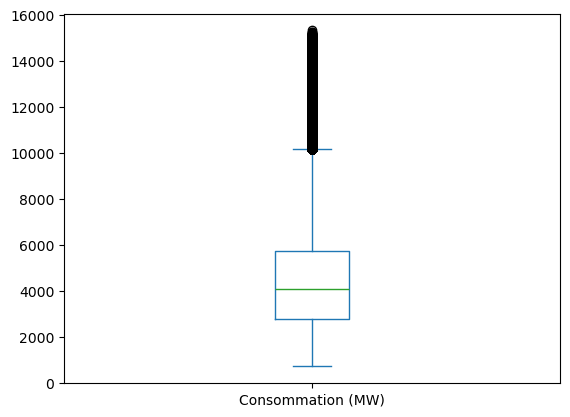

In [61]:
data_Final['Consommation (MW)'].plot(kind='box')

In [63]:
d_F_Conso = data_Final['Consommation (MW)']
d_F_Conso.shape

(1980288,)

In [65]:
d_F_Conso_Q1 = d_F_Conso.quantile(0.25)
d_F_Conso_Q3 = d_F_Conso.quantile(0.75)
d_F_Conso_IQR=d_F_Conso_Q3-d_F_Conso_Q1

In [67]:
d_F_Conso_D1 = d_F_Conso_Q1 - 1.5*d_F_Conso_IQR                       #Valeurs abérante < d_F_TCO_Nucl_D1
d_F_Conso_D3 = d_F_Conso_Q3 + 1.5*d_F_Conso_IQR                       #Valeurs abérante > d_F_TCO_Nucl_D3

In [69]:
d_F_Conso_Outlayers = data_Final[
    (d_F_Conso >= d_F_Conso_D3) |
    (d_F_Conso <= d_F_Conso_D1)
]

In [71]:
d_F_Conso_Outlayers.shape

(41113, 16)

In [73]:
d_F_Conso_Outlayers.shape[0]

41113

In [75]:
d_F_Conso_Outlayers_region_counts = d_F_Conso_Outlayers['region'].value_counts()

In [77]:
d_F_Conso_Outlayers_region_counts

region
Île-de-France           30260
Auvergne-Rhône-Alpes    10853
Name: count, dtype: int64

## Enregistrer graphique

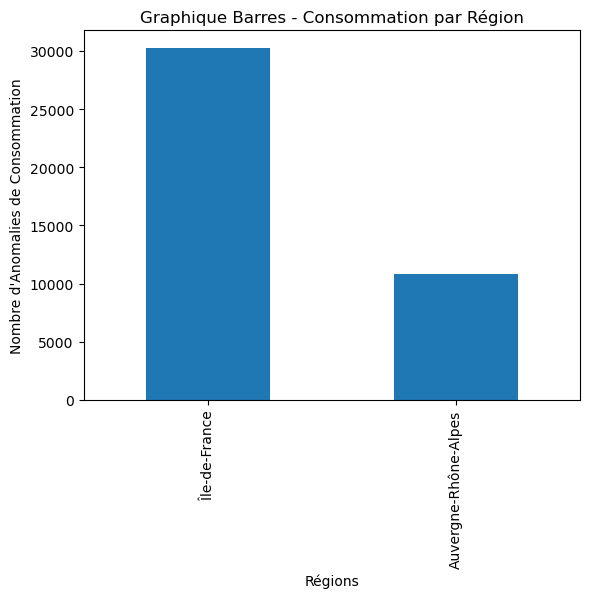

In [80]:
# Générer le graphique en barres
ax = d_F_Conso_Outlayers_region_counts.plot.bar()

# Ajouter des personnalisations (optionnel)
plt.title("Graphique Barres - Consommation par Région")
plt.xlabel("Régions")
plt.ylabel("Nombre d'Anomalies de Consommation")

# Enregistrer le graphique
plt.savefig("graphique_barres_conso_regions.png", dpi=300, bbox_inches='tight')  # Enregistrer en PNG

# Afficher le graphique
plt.show()

<Axes: xlabel='region'>

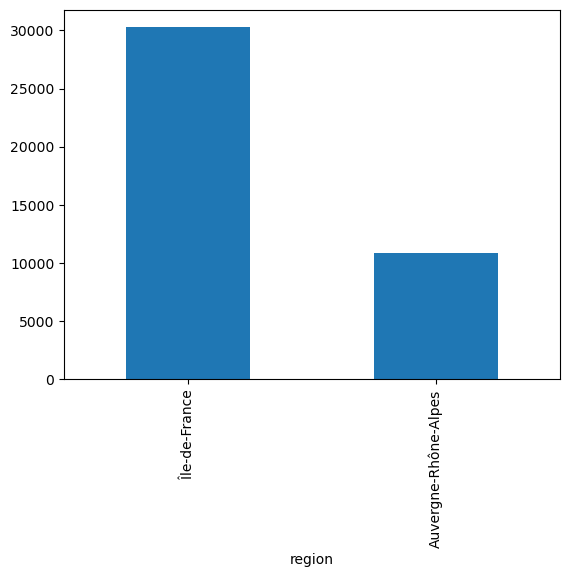

In [82]:
d_F_Conso_Outlayers_region_counts.plot.bar()

## Heatmap: Conso, Population, Région

C:\Users\ethan\AppData\Local\Temp\ipykernel_24940\4179398935.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


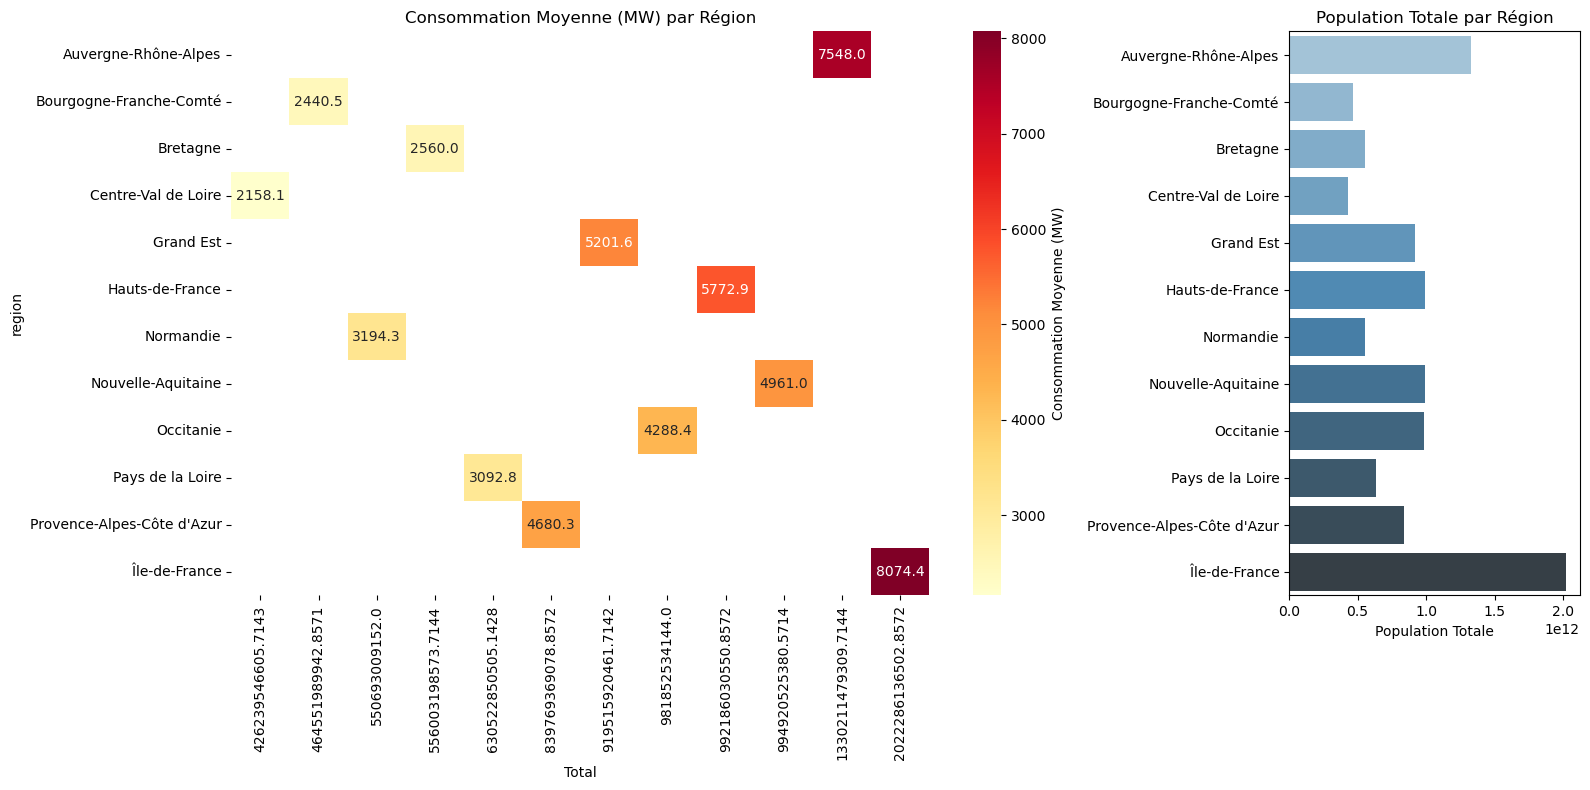

In [68]:
import matplotlib.gridspec as gridspec

# Préparer les données
heatmap_data = data_Final.groupby('region').agg({
    'Consommation (MW)': 'mean',
    'Total': 'sum'
}).reset_index()

heatmap_pivot = heatmap_data.pivot(index='region', columns='Total', values='Consommation (MW)')

# Création de la figure combinée
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# Heatmap
ax0 = plt.subplot(gs[0])
sns.heatmap(
    heatmap_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap="YlOrRd", 
    cbar_kws={'label': 'Consommation Moyenne (MW)'},
    ax=ax0
)
ax0.set_title("Consommation Moyenne (MW) par Région")

# Barplot pour la population
ax1 = plt.subplot(gs[1])
sns.barplot(
    data=heatmap_data, 
    y='region', 
    x='Total', 
    palette='Blues_d', 
    ax=ax1
)
ax1.set_title("Population Totale par Région")
ax1.set_xlabel("Population Totale")
ax1.set_ylabel("")

plt.tight_layout()
plt.show()


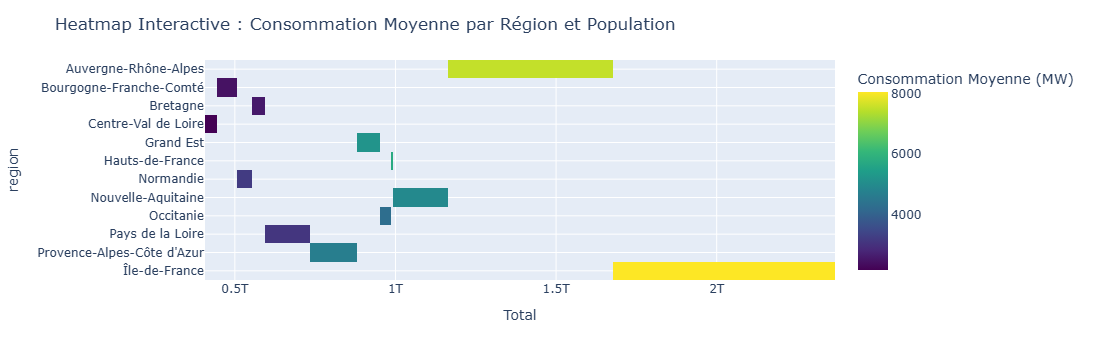

In [69]:
import plotly.express as px

# Créer un tableau interactif
fig = px.imshow(
    heatmap_pivot, 
    labels={'color': 'Consommation Moyenne (MW)'}, 
    x=heatmap_pivot.columns, 
    y=heatmap_pivot.index, 
    color_continuous_scale='Viridis'
)
fig.update_layout(title="Heatmap Interactive : Consommation Moyenne par Région et Population")
fig.show()

In [70]:
"""
DATA:

Nombre Outlayers en TCO Nucléaire : 23 084  #est le même nombre que le nombre de outlayers sup
Réparti sur {
Centre-Val de Loire :    21 404
Normandie           :     1 263
Grand Est           :       417
}

Nombre Outlayers en Consommation : 41 113  #est le même nombre que le nombre de outlayers sup
Réparti sur {
Île-de-France        :    30 260
Auvergne-Rhône-Alpes :    10 853
}

ANALYSE:

Il faut aider l'Île-de-France ainsi que Auvergne-Rhône-Alpes régler leurs consommations abérantes ainsi que le Centre-Val de Loire sur leurs consommations en nucléaire qui à un taûx qui est supérieur àaux taûx optimiser.

"""

"\nDATA:\n\nNombre Outlayers en TCO Nucléaire : 23 084  #est le même nombre que le nombre de outlayers sup\nRéparti sur {\nCentre-Val de Loire :    21 404\nNormandie           :     1 263\nGrand Est           :       417\n}\n\nNombre Outlayers en Consommation : 41 113  #est le même nombre que le nombre de outlayers sup\nRéparti sur {\nÎle-de-France        :    30 260\nAuvergne-Rhône-Alpes :    10 853\n}\n\nANALYSE:\n\nIl faut aider l'Île-de-France ainsi que Auvergne-Rhône-Alpes régler leurs consommations abérantes ainsi que le Centre-Val de Loire sur leurs consommations en nucléaire qui à un taûx qui est supérieur àaux taûx optimiser.\n\n"

# Step 2

In [84]:
data_Final.corr(numeric_only=True)[:2]

Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
Consommation (MW)           1.000000        0.330662        0.206711   
Thermique (MW)              0.330662        1.000000        0.147139   

                   Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
Consommation (MW)     0.063699      0.040126          0.439220   
Thermique (MW)        0.204424     -0.074674          0.003512   

                   Bioénergies (MW)  TCO Nucléaire (%)  TCO Eolien (%)  \
Consommation (MW)          0.613220          -0.225153        0.120288   
Thermique (MW)             0.135295          -0.101059        0.013164   

                   TCO Solaire (%)  TCO Hydraulique (%)  TCO Bioénergies (%)  \
Consommation (MW)        -0.078462             0.311337            -0.360187   
Thermique (MW)           -0.108612             0.000335            -0.170632   

                      Total      tmoy  
Consommation (MW)  0.805256  0.014170  
Thermique (MW)     0.044221 -0.133218

<Axes: >

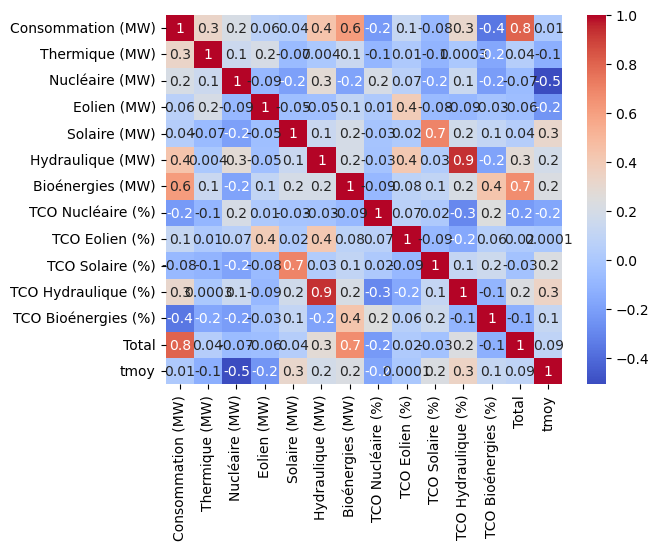

In [86]:
sns.heatmap(data_Final.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

<Axes: >

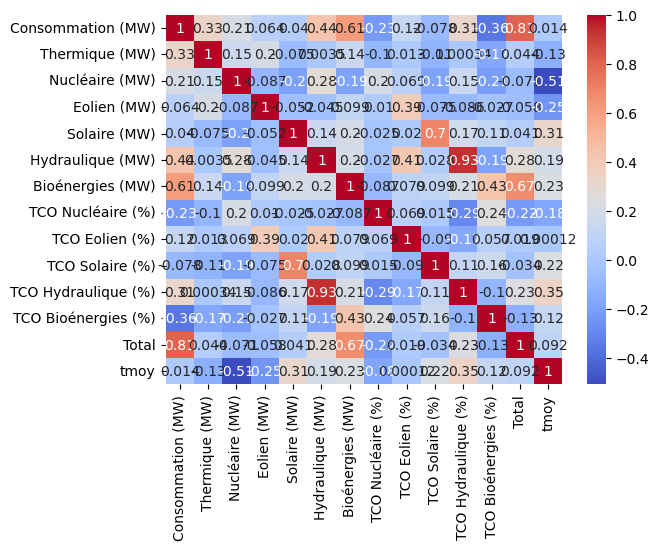

In [91]:
sns.heatmap(data_Final.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [88]:
data_Final.columns

Index(['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy'],
      dtype='object')

In [90]:
data_Final.filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy'])[:2]

region        Date  Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
0  Grand Est  2021-01-11             7403.0          2227.0          9175.0   
1  Grand Est  2021-01-11             6544.0          2148.0          9127.0   

   Eolien (MW)  Solaire (MW)  Hydraulique (MW)  Bioénergies (MW)  \
0        356.0         227.0             554.0             117.0   
1       1963.0           0.0             525.0             118.0   

          Total       tmoy  
0  5.572013e+06  11.448234  
1  5.572013e+06  11.448234

<Axes: >

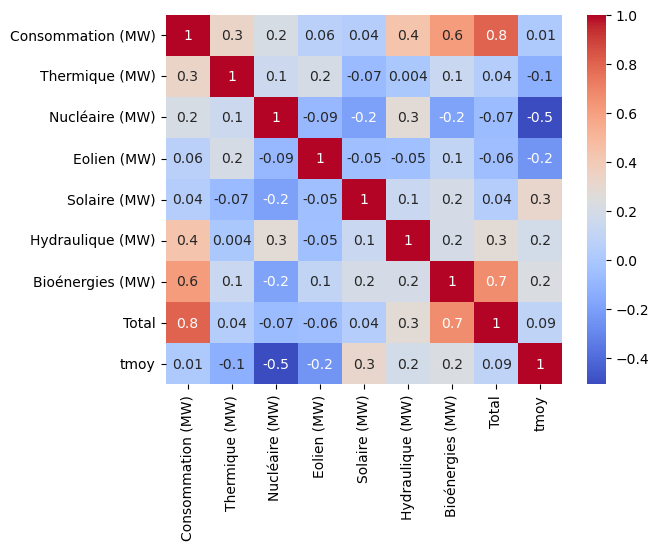

In [109]:
sns.heatmap(data_Final.filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

<Axes: >

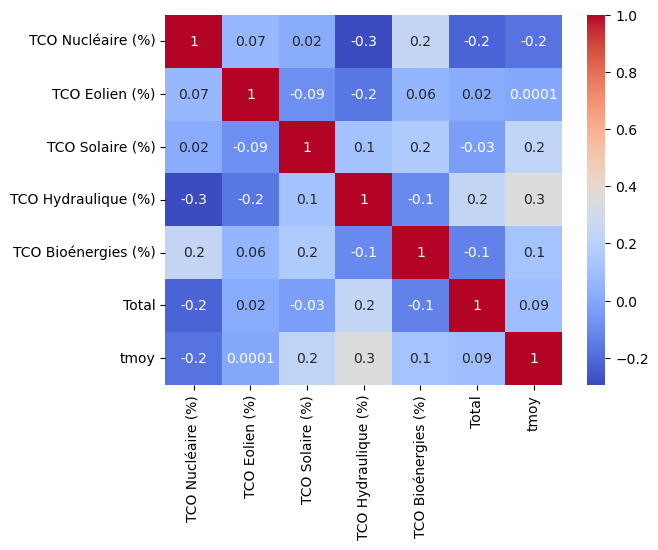

In [111]:
sns.heatmap(data_Final.filter(items=['region', 'Date', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

In [150]:
#simple sur le clustering (

In [152]:
#pip install yellowbrick

In [92]:
data=data_Final.fillna(0)
data[:3]

region        Date  Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
0  Grand Est  2021-01-11             7403.0          2227.0          9175.0   
1  Grand Est  2021-01-11             6544.0          2148.0          9127.0   
2  Grand Est  2021-01-12             6276.0          1983.0          9039.0   

   Eolien (MW)  Solaire (MW)  Hydraulique (MW)  Bioénergies (MW)  \
0        356.0         227.0             554.0             117.0   
1       1963.0           0.0             525.0             118.0   
2       2585.0           0.0             443.0             118.0   

   TCO Nucléaire (%)  TCO Eolien (%)  TCO Solaire (%)  TCO Hydraulique (%)  \
0               3.07            7.48             1.58                  0.0   
1               0.00            8.02             1.80                  0.0   
2               0.00            7.06             1.88                  0.0   

   TCO Bioénergies (%)         Total       tmoy  
0                  0.0  5.572013e+06  11.448234  
1                  0.0  5.572013e+06  11.448234  
2                  0.0  5.572013e+06  11.448234

In [93]:
data=data.drop(columns="Date")
data[:3]

region  Consommation (MW)  Thermique (MW)  Nucléaire (MW)  Eolien (MW)  \
0  Grand Est             7403.0          2227.0          9175.0        356.0   
1  Grand Est             6544.0          2148.0          9127.0       1963.0   
2  Grand Est             6276.0          1983.0          9039.0       2585.0   

   Solaire (MW)  Hydraulique (MW)  Bioénergies (MW)  TCO Nucléaire (%)  \
0         227.0             554.0             117.0               3.07   
1           0.0             525.0             118.0               0.00   
2           0.0             443.0             118.0               0.00   

   TCO Eolien (%)  TCO Solaire (%)  TCO Hydraulique (%)  TCO Bioénergies (%)  \
0            7.48             1.58                  0.0                  0.0   
1            8.02             1.80                  0.0                  0.0   
2            7.06             1.88                  0.0                  0.0   

          Total       tmoy  
0  5.572013e+06  11.448234  
1  5.572013e+06  11.448234  
2  5.572013e+06  11.448234

In [96]:
data2=data.groupby("region").mean()
data2

Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
region                                                                          
Auvergne-Rhône-Alpes              7547.927514      232.395100     9509.013465   
Bourgogne-Franche-Comté           2440.474949       84.308785        0.000000   
Bretagne                          2560.000218       92.514671        0.000000   
Centre-Val de Loire               2158.059276       40.766664     8295.994140   
Grand Est                         5201.618086     1044.516610     8613.621970   
Hauts-de-France                   5772.878848      937.972519     3760.187700   
Normandie                         3194.312851      433.655317     6761.141192   
Nouvelle-Aquitaine                4960.927386      102.229409     4732.819741   
Occitanie                         4288.412243       33.856803     1955.332218   
Pays de la Loire                  3092.770694      512.254399        0.000000   
Provence-Alpes-Côte d'Azur        4680.235584      765.097652        0.000000   
Île-de-France                     8074.329891      260.596307        0.000000   

                            Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
region                                                                    
Auvergne-Rhône-Alpes         114.694711    116.145342       3207.884193   
Bourgogne-Franche-Comté      133.391404     33.211497         96.533522   
Bretagne                     196.197711     25.272839         66.341441   
Centre-Val de Loire          248.891216     37.650524         13.673775   
Grand Est                    696.449844     76.941742        947.419981   
Hauts-de-France              794.172611     18.857257          1.470235   
Normandie                    165.752703     17.422605         14.070408   
Nouvelle-Aquitaine           175.781886    290.377254        424.917315   
Occitanie                    341.872697    239.328043       1312.614117   
Pays de la Loire             181.732475     60.520373          2.130048   
Provence-Alpes-Côte d'Azur    13.673126    177.125085       1108.998485   
Île-de-France                 15.065136     10.775366          5.843659   

                            Bioénergies (MW)  TCO Nucléaire (%)  \
region                                                            
Auvergne-Rhône-Alpes              105.655074          16.913417   
Bourgogne-Franche-Comté            27.813191           0.243673   
Bretagne                           39.915691           0.152736   
Centre-Val de Loire                52.144700          48.096665   
Grand Est                          95.466647          18.556576   
Hauts-de-France                   107.133575           9.247585   
Normandie                          54.384344          21.504851   
Nouvelle-Aquitaine                162.490171          12.310707   
Occitanie                          81.111232           6.681018   
Pays de la Loire                   44.417539           0.361009   
Provence-Alpes-Côte d'Azur         93.171321           0.625494   
Île-de-France                     136.227706           0.027009   

                            TCO Eolien (%)  TCO Solaire (%)  \
region                                                        
Auvergne-Rhône-Alpes              5.477262         0.541620   
Bourgogne-Franche-Comté           1.837408         0.552820   
Bretagne                          1.623352         0.439047   
Centre-Val de Loire               2.249181         0.792492   
Grand Est                         4.979348         0.603995   
Hauts-de-France                   3.124758         0.316895   
Normandie                         1.017301         0.417235   
Nouvelle-Aquitaine                1.856794         1.692803   
Occitanie                         4.532095         1.358838   
Pays de la Loire                  1.196210         0.642025   
Provence-Alpes-Côte d'Azur        2.588417         0.997081   
Île-de-France                     0.065575         0.263130   

                    

C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

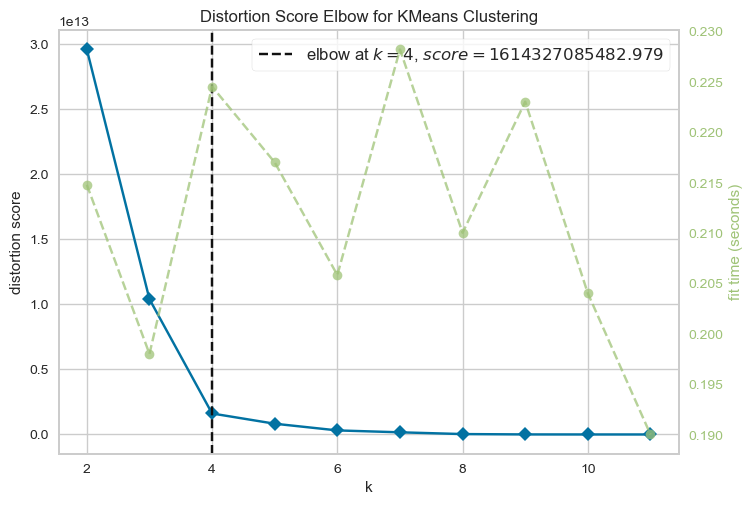

In [114]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Dataset synthétique ou réel
X = data2

# Modèle et visualiseur Yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

# Ajustement et rendu
visualizer.fit(X)        # Ajuste les données au visualiseur

# Accéder à la figure Matplotlib sous-jacente et enregistrer
visualizer.show(outpath="kmeans_elbow_visualizer.png")  # Enregistrer directement avec Yellowbrick
# Si vous souhaitez une alternative via Matplotlib :
# plt.savefig("kmeans_elbow_visualizer.png", dpi=300, bbox_inches='tight')

# Optionnel : afficher dans Jupyter Notebook
plt.show()


C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

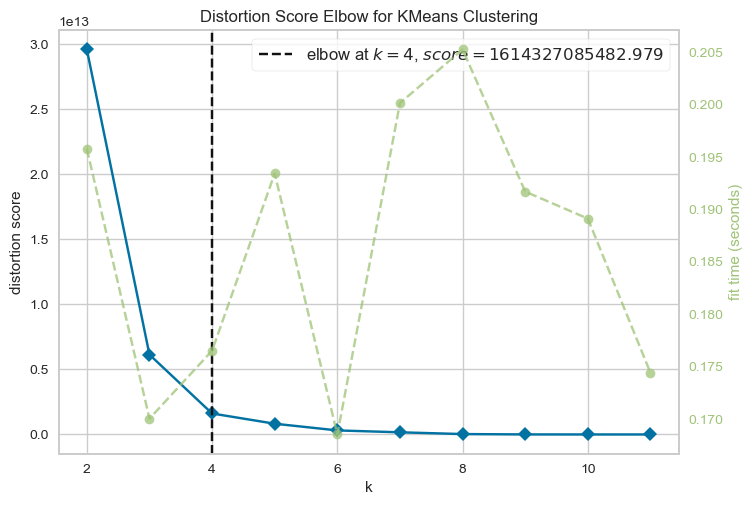

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X = data2

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<Axes: >

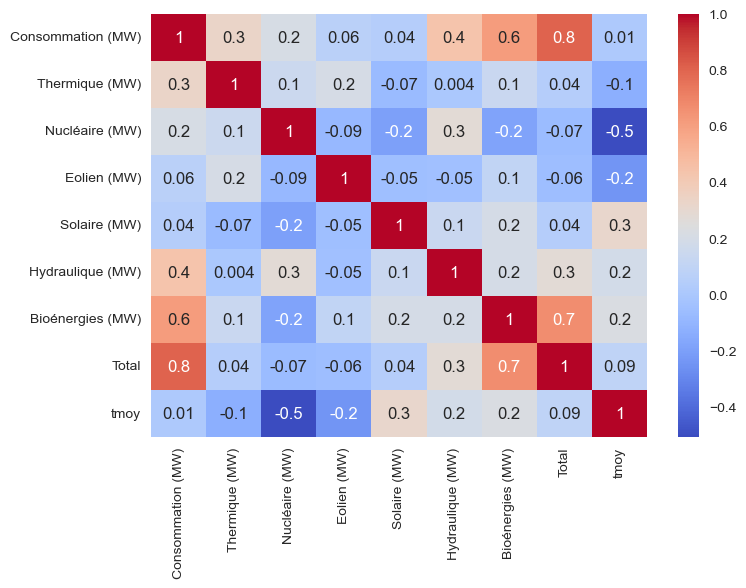

In [99]:
sns.heatmap(data_Final.filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


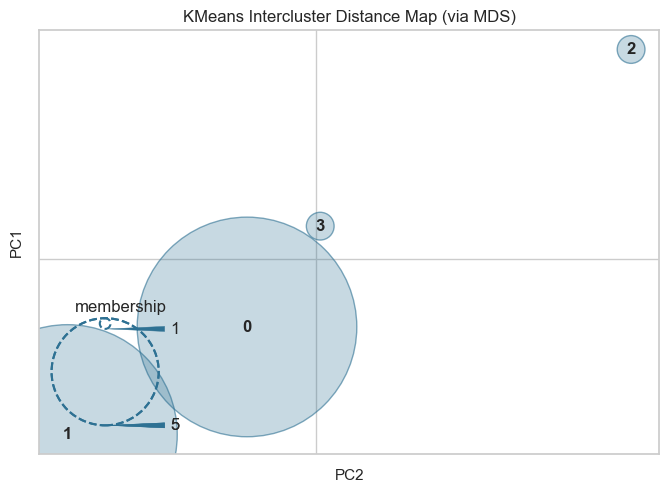

In [116]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance
import matplotlib.pyplot as plt

# Données pour le clustering
X = data2

# Modèle et visualiseur Yellowbrick
model = KMeans(4)  # 4 clusters
visualizer = InterclusterDistance(model)

# Ajustement et rendu
visualizer.fit(X)  # Ajuster les données au visualiseur

# Enregistrer la figure
visualizer.show(outpath="intercluster_distance_visualizer.png")  # Méthode directe avec Yellowbrick
# Ou avec Matplotlib si besoin de plus de contrôle :
# plt.savefig("intercluster_distance_visualizer.png", dpi=300, bbox_inches='tight')

# Optionnel : Affichage dans Jupyter Notebook
plt.show()


C:\Users\ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


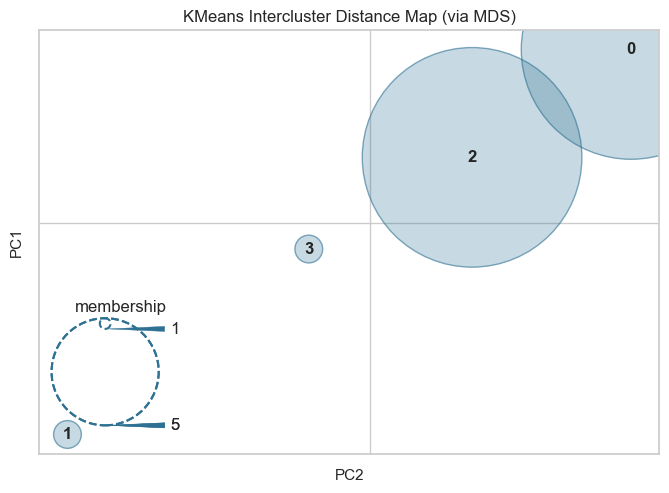

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [100]:
from yellowbrick.cluster import InterclusterDistance


# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [118]:
X["cluster"]=model.predict(X)
X

Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
region                                                                          
Auvergne-Rhône-Alpes              7547.927514      232.395100     9509.013465   
Bourgogne-Franche-Comté           2440.474949       84.308785        0.000000   
Bretagne                          2560.000218       92.514671        0.000000   
Centre-Val de Loire               2158.059276       40.766664     8295.994140   
Grand Est                         5201.618086     1044.516610     8613.621970   
Hauts-de-France                   5772.878848      937.972519     3760.187700   
Normandie                         3194.312851      433.655317     6761.141192   
Nouvelle-Aquitaine                4960.927386      102.229409     4732.819741   
Occitanie                         4288.412243       33.856803     1955.332218   
Pays de la Loire                  3092.770694      512.254399        0.000000   
Provence-Alpes-Côte d'Azur        4680.235584      765.097652        0.000000   
Île-de-France                     8074.329891      260.596307        0.000000   

                            Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
region                                                                    
Auvergne-Rhône-Alpes         114.694711    116.145342       3207.884193   
Bourgogne-Franche-Comté      133.391404     33.211497         96.533522   
Bretagne                     196.197711     25.272839         66.341441   
Centre-Val de Loire          248.891216     37.650524         13.673775   
Grand Est                    696.449844     76.941742        947.419981   
Hauts-de-France              794.172611     18.857257          1.470235   
Normandie                    165.752703     17.422605         14.070408   
Nouvelle-Aquitaine           175.781886    290.377254        424.917315   
Occitanie                    341.872697    239.328043       1312.614117   
Pays de la Loire             181.732475     60.520373          2.130048   
Provence-Alpes-Côte d'Azur    13.673126    177.125085       1108.998485   
Île-de-France                 15.065136     10.775366          5.843659   

                            Bioénergies (MW)  TCO Nucléaire (%)  \
region                                                            
Auvergne-Rhône-Alpes              105.655074          16.913417   
Bourgogne-Franche-Comté            27.813191           0.243673   
Bretagne                           39.915691           0.152736   
Centre-Val de Loire                52.144700          48.096665   
Grand Est                          95.466647          18.556576   
Hauts-de-France                   107.133575           9.247585   
Normandie                          54.384344          21.504851   
Nouvelle-Aquitaine                162.490171          12.310707   
Occitanie                          81.111232           6.681018   
Pays de la Loire                   44.417539           0.361009   
Provence-Alpes-Côte d'Azur         93.171321           0.625494   
Île-de-France                     136.227706           0.027009   

                            TCO Eolien (%)  TCO Solaire (%)  \
region                                                        
Auvergne-Rhône-Alpes              5.477262         0.541620   
Bourgogne-Franche-Comté           1.837408         0.552820   
Bretagne                          1.623352         0.439047   
Centre-Val de Loire               2.249181         0.792492   
Grand Est                         4.979348         0.603995   
Hauts-de-France                   3.124758         0.316895   
Normandie                         1.017301         0.417235   
Nouvelle-Aquitaine                1.856794         1.692803   
Occitanie                         4.532095         1.358838   
Pays de la Loire                  1.196210         0.642025   
Provence-Alpes-Côte d'Azur        2.588417         0.997081   
Île-de-France                     0.065575         0.263130   

                    

In [120]:
for i in range(4):
    print("Cluster :", i,"\t", X.query(f"cluster=={i}").index, end='\n\n')



Cluster : 0 	 Index(['Grand Est', 'Hauts-de-France', 'Nouvelle-Aquitaine', 'Occitanie',
       'Provence-Alpes-Côte d'Azur'],
      dtype='object', name='region')

Cluster : 1 	 Index(['Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire',
       'Normandie', 'Pays de la Loire'],
      dtype='object', name='region')

Cluster : 2 	 Index(['Île-de-France'], dtype='object', name='region')

Cluster : 3 	 Index(['Auvergne-Rhône-Alpes'], dtype='object', name='region')



## Algorithmes pour la détection d’anomalies

Identifier des points de données atypiques.

Isolation Forest :
Isoler les anomalies en construisant des arbres.
One-Class SVM :
Identifier des anomalies en séparant la majorité des données.
Autoencodeurs (Deep Learning) :
Reconstruire les données et détecter les écarts.

### Isolation Forest

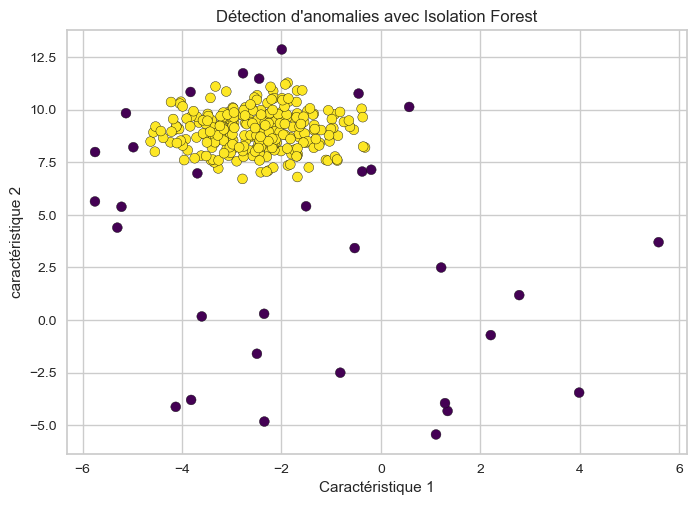

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
# Générer des exemples de données
X, _ = make_blobs(n_samples=300, centers=1, random_state=42)
# Ajoute quelques valeurs aberrantes
outliers = np.random.RandomState(42).uniform(low=-6, high=6, size=(20, 2))
X = np.r_[X, outliers]
# Adapte le modèle Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)
# Prévision des anomalies
y_pred = clf.predict(X)
# Visualisation des résultats
plt.scatter(X[ :, 0], X[ :, 1], c=y_pred, s=50, edgecolors='k', cmap='viridis')
plt.title("Détection d'anomalies avec Isolation Forest")
plt.xlabel('Caractéristique 1')
plt.ylabel('caractéristique 2')
plt.show()

In [173]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
# Générer des exemples de données
X = data_Final.fillna(0).drop(columns="Date").groupby("region").mean()
X.head()

Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
region                                                                       
Auvergne-Rhône-Alpes           7547.927514      232.395100     9509.013465   
Bourgogne-Franche-Comté        2440.474949       84.308785        0.000000   
Bretagne                       2560.000218       92.514671        0.000000   
Centre-Val de Loire            2158.059276       40.766664     8295.994140   
Grand Est                      5201.618086     1044.516610     8613.621970   

                         Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
region                                                                 
Auvergne-Rhône-Alpes      114.694711    116.145342       3207.884193   
Bourgogne-Franche-Comté   133.391404     33.211497         96.533522   
Bretagne                  196.197711     25.272839         66.341441   
Centre-Val de Loire       248.891216     37.650524         13.673775   
Grand Est                 696.449844     76.941742        947.419981   

                         Bioénergies (MW)  TCO Nucléaire (%)  TCO Eolien (%)  \
region                                                                         
Auvergne-Rhône-Alpes           105.655074          16.913417        5.477262   
Bourgogne-Franche-Comté         27.813191           0.243673        1.837408   
Bretagne                        39.915691           0.152736        1.623352   
Centre-Val de Loire             52.144700          48.096665        2.249181   
Grand Est                       95.466647          18.556576        4.979348   

                         TCO Solaire (%)  TCO Hydraulique (%)  \
region                                                          
Auvergne-Rhône-Alpes            0.541620             6.201943   
Bourgogne-Franche-Comté         0.552820             0.457833   
Bretagne                        0.439047             0.397487   
Centre-Val de Loire             0.792492             0.081741   
Grand Est                       0.603995             2.456249   

                         TCO Bioénergies (%)         Total       tmoy  
region                                                                 
Auvergne-Rhône-Alpes                0.227704  8.060715e+06  12.331249  
Bourgogne-Franche-Comté             0.261808  2.815057e+06  12.111700  
Bretagne                            0.285460  3.369226e+06  12.271176  
Centre-Val de Loire                 0.411161  2.582894e+06  12.419540  
Grand Est                           0.351714  5.572013e+06  11.448234

In [175]:

# Adapte le modèle Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)
# Prévision des anomalies
y_pred = clf.predict(X)


In [177]:
y_pred

array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

In [179]:
X.columns

Index(['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)',
       'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)',
       'TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)',
       'TCO Hydraulique (%)', 'TCO Bioénergies (%)', 'Total', 'tmoy'],
      dtype='object')

In [181]:
X

Consommation (MW)  Thermique (MW)  Nucléaire (MW)  \
region                                                                          
Auvergne-Rhône-Alpes              7547.927514      232.395100     9509.013465   
Bourgogne-Franche-Comté           2440.474949       84.308785        0.000000   
Bretagne                          2560.000218       92.514671        0.000000   
Centre-Val de Loire               2158.059276       40.766664     8295.994140   
Grand Est                         5201.618086     1044.516610     8613.621970   
Hauts-de-France                   5772.878848      937.972519     3760.187700   
Normandie                         3194.312851      433.655317     6761.141192   
Nouvelle-Aquitaine                4960.927386      102.229409     4732.819741   
Occitanie                         4288.412243       33.856803     1955.332218   
Pays de la Loire                  3092.770694      512.254399        0.000000   
Provence-Alpes-Côte d'Azur        4680.235584      765.097652        0.000000   
Île-de-France                     8074.329891      260.596307        0.000000   

                            Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
region                                                                    
Auvergne-Rhône-Alpes         114.694711    116.145342       3207.884193   
Bourgogne-Franche-Comté      133.391404     33.211497         96.533522   
Bretagne                     196.197711     25.272839         66.341441   
Centre-Val de Loire          248.891216     37.650524         13.673775   
Grand Est                    696.449844     76.941742        947.419981   
Hauts-de-France              794.172611     18.857257          1.470235   
Normandie                    165.752703     17.422605         14.070408   
Nouvelle-Aquitaine           175.781886    290.377254        424.917315   
Occitanie                    341.872697    239.328043       1312.614117   
Pays de la Loire             181.732475     60.520373          2.130048   
Provence-Alpes-Côte d'Azur    13.673126    177.125085       1108.998485   
Île-de-France                 15.065136     10.775366          5.843659   

                            Bioénergies (MW)  TCO Nucléaire (%)  \
region                                                            
Auvergne-Rhône-Alpes              105.655074          16.913417   
Bourgogne-Franche-Comté            27.813191           0.243673   
Bretagne                           39.915691           0.152736   
Centre-Val de Loire                52.144700          48.096665   
Grand Est                          95.466647          18.556576   
Hauts-de-France                   107.133575           9.247585   
Normandie                          54.384344          21.504851   
Nouvelle-Aquitaine                162.490171          12.310707   
Occitanie                          81.111232           6.681018   
Pays de la Loire                   44.417539           0.361009   
Provence-Alpes-Côte d'Azur         93.171321           0.625494   
Île-de-France                     136.227706           0.027009   

                            TCO Eolien (%)  TCO Solaire (%)  \
region                                                        
Auvergne-Rhône-Alpes              5.477262         0.541620   
Bourgogne-Franche-Comté           1.837408         0.552820   
Bretagne                          1.623352         0.439047   
Centre-Val de Loire               2.249181         0.792492   
Grand Est                         4.979348         0.603995   
Hauts-de-France                   3.124758         0.316895   
Normandie                         1.017301         0.417235   
Nouvelle-Aquitaine                1.856794         1.692803   
Occitanie                         4.532095         1.358838   
Pays de la Loire                  1.196210         0.642025   
Provence-Alpes-Côte d'Azur        2.588417         0.997081   
Île-de-France                     0.065575         0.263130   

                    

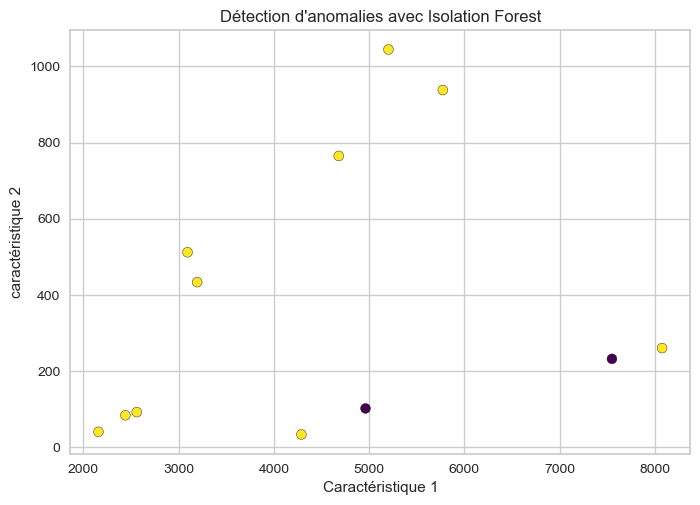

In [183]:
# Visualisation des résultats
plt.scatter(X['Consommation (MW)'], X['Thermique (MW)'], c=y_pred, s=50, edgecolors='k', cmap='viridis')
plt.title("Détection d'anomalies avec Isolation Forest")
plt.xlabel('Caractéristique 1')
plt.ylabel('caractéristique 2')
plt.show()

### Isolation Forest 2

In [124]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [126]:
#data_Final

In [128]:
X = data_Final #.fillna(0)

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

X = X.select_dtypes(include=[np.number])

In [130]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [132]:
isolation_forest = IsolationForest(contamination=0.1, random_state=42)  # contamination = proportion d'anomalies attendue
labels = isolation_forest.fit_predict(X)

In [134]:
data_Final['Anomaly'] = labels

In [136]:
outliers = data_Final[data_Final['Anomaly'] == -1]

In [138]:
data_Final['Anomaly'].value_counts()

Anomaly
 1    1782259
-1     198029
Name: count, dtype: int64

In [140]:
data_Final['Anomaly']

0          1
1         -1
2          1
3         -1
4         -1
          ..
1980283   -1
1980284   -1
1980285   -1
1980286   -1
1980287    1
Name: Anomaly, Length: 1980288, dtype: int32

In [142]:
outliers

region        Date  Consommation (MW)  Thermique (MW)  \
1              Grand Est  2021-01-11             6544.0          2148.0   
3              Grand Est  2021-01-12             6111.0          1797.0   
4              Grand Est  2021-01-12             6693.0          2109.0   
5              Grand Est  2021-01-12             7244.0          2125.0   
6              Grand Est  2021-01-12             7526.0          2131.0   
...                  ...         ...                ...             ...   
1980282  Hauts-de-France  2020-10-07             5927.0          1592.0   
1980283  Hauts-de-France  2020-10-07             5590.0          1193.0   
1980284  Hauts-de-France  2020-10-07             5530.0          1283.0   
1980285  Hauts-de-France  2020-10-07             5427.0          1406.0   
1980286  Hauts-de-France  2020-10-07             5618.0          1607.0   

         Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
1                9127.0       1963.0           0.0             525.0   
3                8947.0       2740.0           0.0             425.0   
4                8942.0       2901.0           0.0             454.0   
5                9119.0       2927.0           5.0             551.0   
6                9103.0       2930.0          19.0             629.0   
...                 ...          ...           ...               ...   
1980282          2697.0       1237.0          34.0               1.0   
1980283          2707.0       2588.0          70.0               1.0   
1980284          2707.0       2539.0          67.0               1.0   
1980285          2706.0       2060.0          30.0               1.0   
1980286          2706.0       1334.0           9.0               1.0   

         Bioénergies (MW)  TCO Nucléaire (%)  TCO Eolien (%)  TCO Solaire (%)  \
1                   118.0               0.00            8.02             1.80   
3                   119.0               0.00            6.95             1.95   
4                   112.0               0.00            6.78             1.67   
5                   112.0               0.07            7.61             1.55   
6                   110.0               0.25            8.36             1.46   
...                   ...                ...             ...              ...   
1980282             104.0              45.50           20.87             0.57   
1980283             104.0              48.43           46.30             1.25   
1980284             106.0              48.95           45.91             1.21   
1980285             103.0              49.86           37.96             0.55   
1980286             105.0              48.17           23.75             0.16   

         TCO Hydraulique (%)  TCO Bioénergies (%)         Total       tmoy  \
1                       1.98                 2.15  5.572013e+06  11.448234   
3                       1.98                 2.15  5.572013e+06  11.448234   
4                       1.98                 2.15  5.572013e+06  11.448234   
5                       1.98                 2.15  5.572013e+06  11.448234   
6                       1.98                 2.15  5.572013e+06  11.448234   
...                      ...                  ...           ...        ...   
1980282                 0.02                 1.75  6.012374e+06  11.593416   
1980283                 0.02                 1.86  6.012374e+06  11.593416   
1980284                 0.02                 1.92  6.012374e+06  11.593416   
1980285                 0.02                 1.90  6.012374e+06  11.593416   
1980286                 0.02                 1.87  6.012374e+06  11.593416   

         Anomaly  
1             -1  
3             -1  
4             -1  
5             -1  
6             -1  
...          ...  
1980282       -1  
1980283       -1  
1980284       -1  
1980285       -1  
1980286       -1  

[198029 rows x 17 columns]

In [144]:
"""X=data_Final.fillna(0)
X = X.drop(columns=["Unnamed: 0",'region',"Date"])
X = X.iloc[:, :].values"""

'X=data_Final.fillna(0)\nX = X.drop(columns=["Unnamed: 0",\'region\',"Date"])\nX = X.iloc[:, :].values'

In [146]:
"""scaler = StandardScaler()
X = scaler.fit_transform(X)"""

'scaler = StandardScaler()\nX = scaler.fit_transform(X)'

In [148]:
data_final_anomalie_region = data_Final[data_Final['Anomaly'] == -1].groupby('region') .size().reset_index(name='Count')
data_final_anomalie_region_V2 = data_final_anomalie_region.sort_values(by='Count').set_index('region')
data_final_anomalie_region_V2

Count
region                           
Bretagne                      676
Bourgogne-Franche-Comté       816
Pays de la Loire              884
Île-de-France                8669
Normandie                    8796
Hauts-de-France             17988
Provence-Alpes-Côte d'Azur  20681
Centre-Val de Loire         21418
Nouvelle-Aquitaine          22795
Occitanie                   26715
Grand Est                   27611
Auvergne-Rhône-Alpes        40980

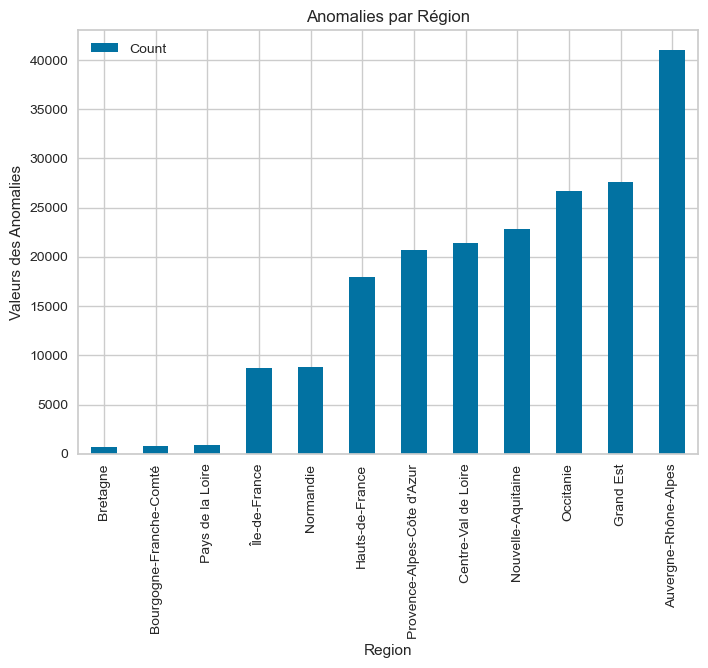

In [150]:
# Générer le graphique
ax = data_final_anomalie_region_V2.plot.bar()

# Ajouter des étiquettes et personnalisation
plt.xlabel("Region")
plt.ylabel("Valeurs des Anomalies")
plt.title("Anomalies par Région")

# Enregistrer le graphique
plt.savefig("anomalies_region_bar.png", dpi=300, bbox_inches='tight')  # Enregistrement en PNG

# Afficher le graphique (optionnel)
plt.show()

Text(0.5, 0, 'region')

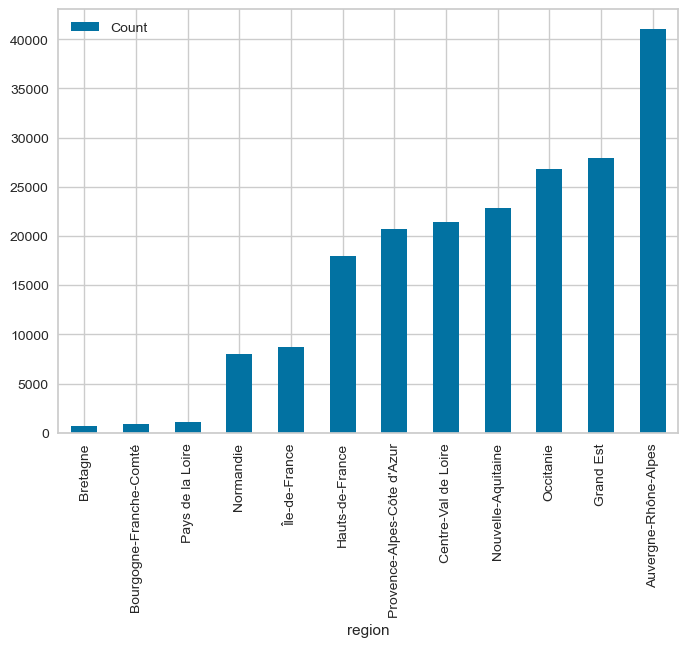

In [285]:
data_final_anomalie_region_V2.plot.bar()
plt.xlabel("region")

In [287]:
data_final_anomalie_region1 = data_Final.groupby('region').size().reset_index(name='Count')
data_final_anomalie_region1

region   Count
0         Auvergne-Rhône-Alpes  165024
1      Bourgogne-Franche-Comté  165024
2                     Bretagne  165024
3          Centre-Val de Loire  165024
4                    Grand Est  165024
5              Hauts-de-France  165024
6                    Normandie  165024
7           Nouvelle-Aquitaine  165024
8                    Occitanie  165024
9             Pays de la Loire  165024
10  Provence-Alpes-Côte d'Azur  165024
11               Île-de-France  165024

# Step 3

In [15]:
data_Final["region"].unique()

array(['Grand Est', 'Nouvelle-Aquitaine', 'Bretagne',
       'Centre-Val de Loire', 'Hauts-de-France', 'Normandie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur",
       'Pays de la Loire', 'Occitanie', 'Île-de-France',
       'Bourgogne-Franche-Comté'], dtype=object)

In [17]:
#data_Final[data_Final["region"]=="Auvergne-Rhône-Alpes"]  #à passer dans le heatmap par région

## Auvergne-Rhône-Alpes

<Axes: >

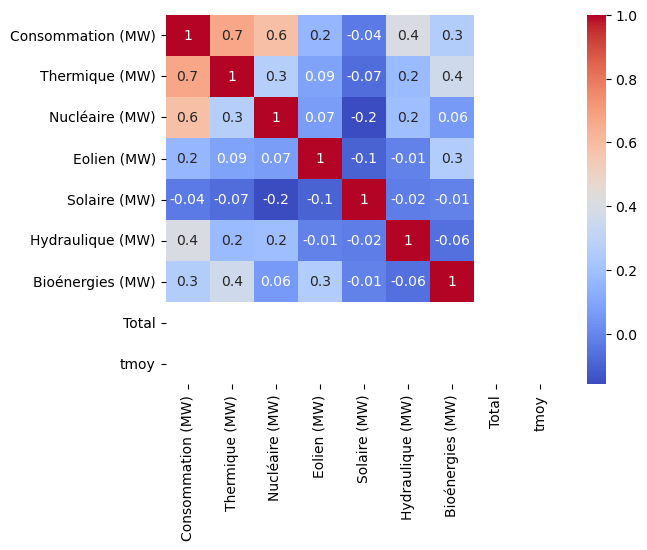

In [142]:
sns.heatmap(data_Final[data_Final["region"]=="Auvergne-Rhône-Alpes"].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

<Axes: >

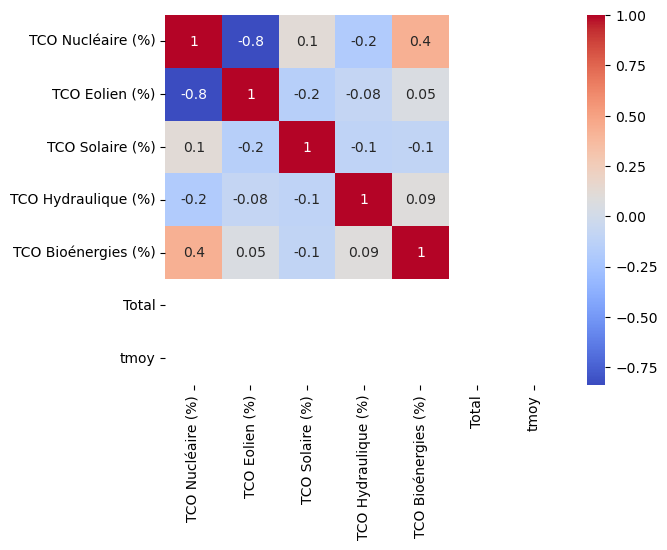

In [152]:
sns.heatmap(data_Final[data_Final["region"]=="Auvergne-Rhône-Alpes"].filter(items=['region', 'Date', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Bourgogne-Franche-Comté

<Axes: >

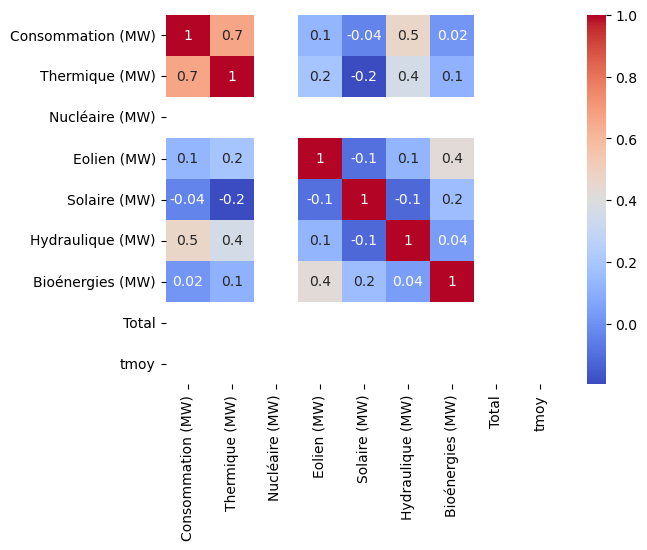

In [144]:
sns.heatmap(data_Final[data_Final["region"]=="Bourgogne-Franche-Comté"].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

<Axes: >

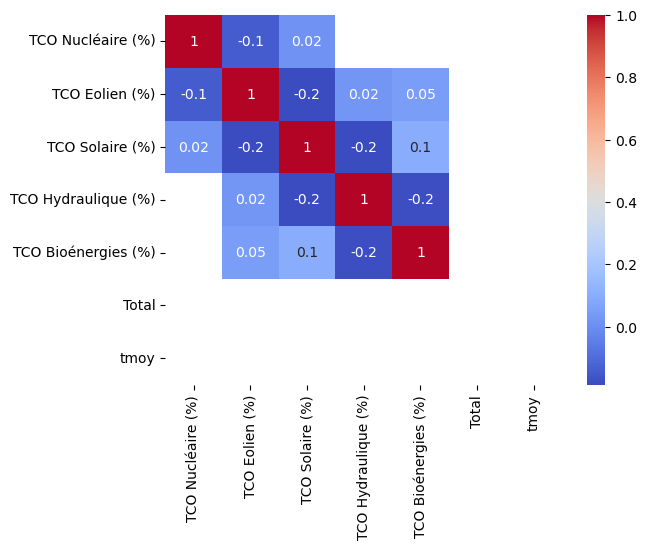

In [154]:
sns.heatmap(data_Final[data_Final["region"]=="Bourgogne-Franche-Comté"].filter(items=['region', 'Date', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Bretagne

<Axes: >

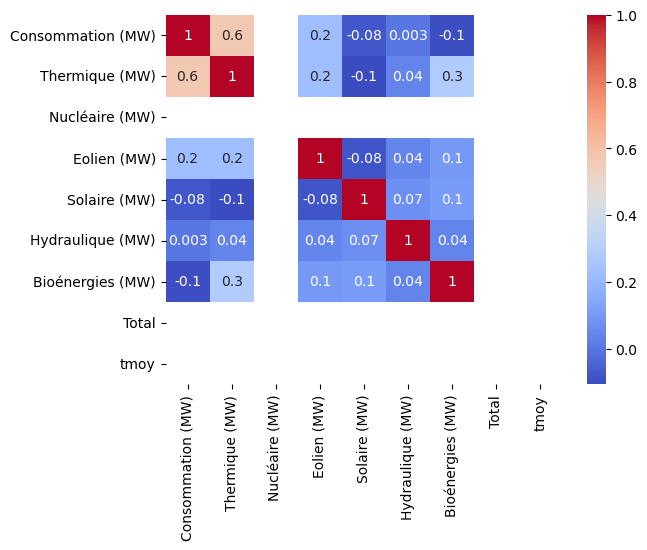

In [20]:
sns.heatmap(data_Final[data_Final["region"]=='Bretagne'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Centre-Val de Loire

<Axes: >

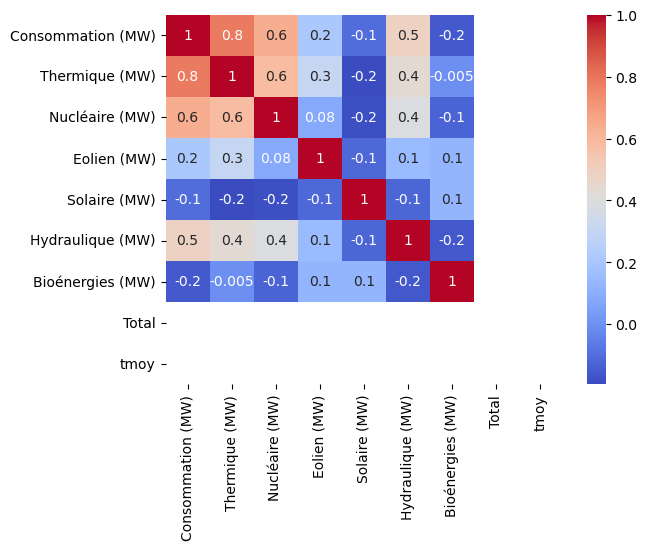

In [25]:
sns.heatmap(data_Final[data_Final["region"]=='Centre-Val de Loire'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

<Axes: >

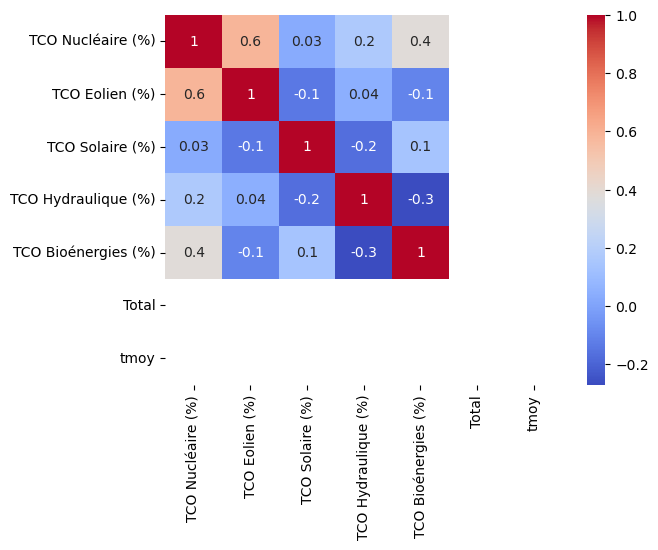

In [82]:
sns.heatmap(data_Final[data_Final["region"]=='Centre-Val de Loire'].filter(items=['region', 'Date', 'TCO Nucléaire (%)', 'TCO Eolien (%)',
       'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)',
       'Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Grand Est

<Axes: >

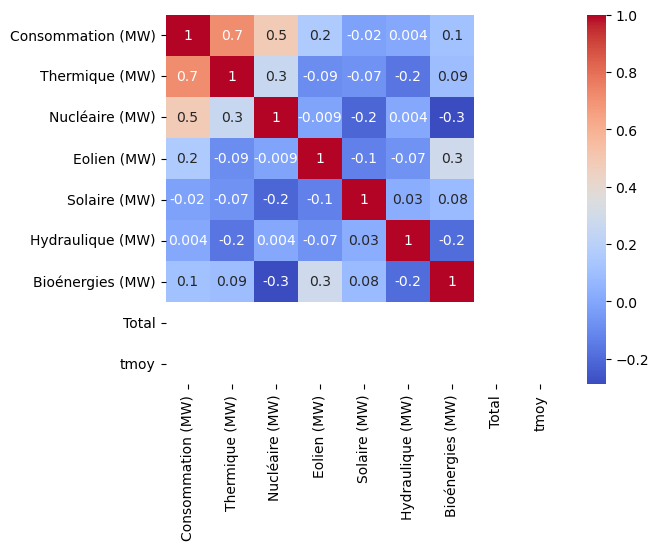

In [28]:
sns.heatmap(data_Final[data_Final["region"]=='Grand Est'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Hauts-de-France

<Axes: >

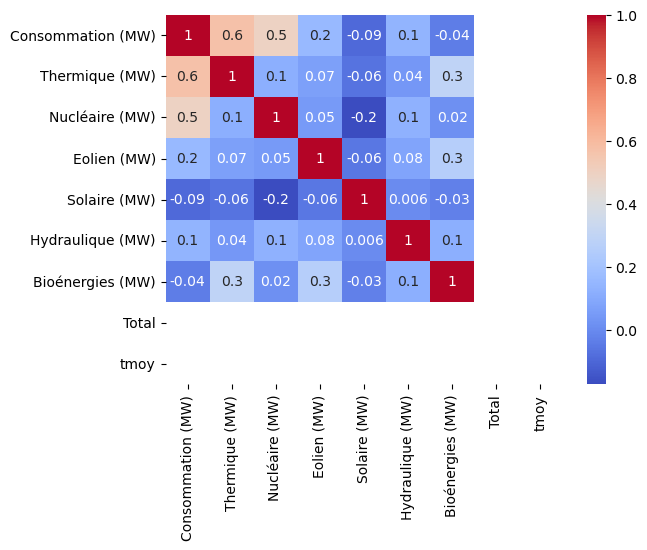

In [32]:
sns.heatmap(data_Final[data_Final["region"]=='Hauts-de-France'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Normandie

<Axes: >

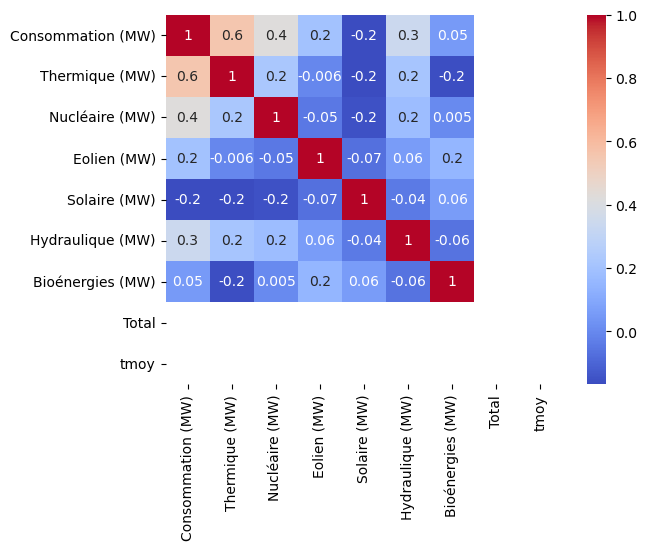

In [36]:
sns.heatmap(data_Final[data_Final["region"]=='Normandie'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Nouvelle-Aquitaine

<Axes: >

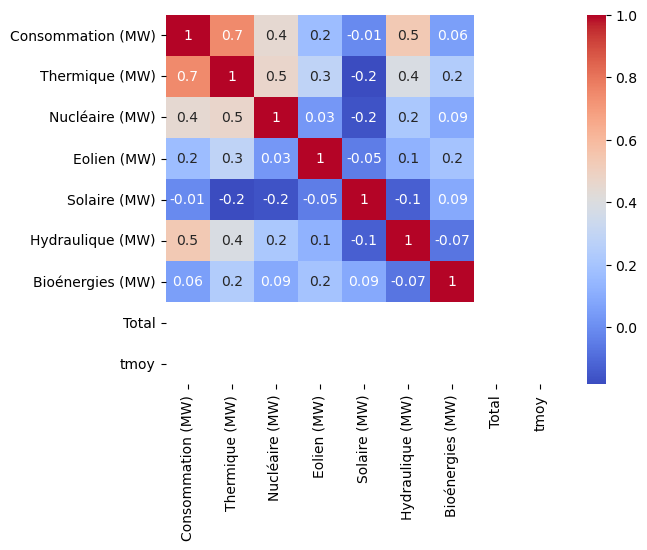

In [41]:
sns.heatmap(data_Final[data_Final["region"]=='Nouvelle-Aquitaine'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Occitanie

<Axes: >

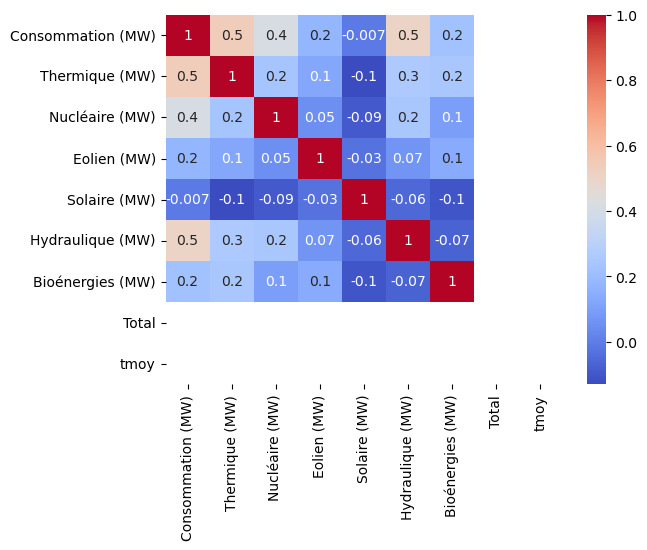

In [46]:
sns.heatmap(data_Final[data_Final["region"]=='Occitanie'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Pays de la Loire

<Axes: >

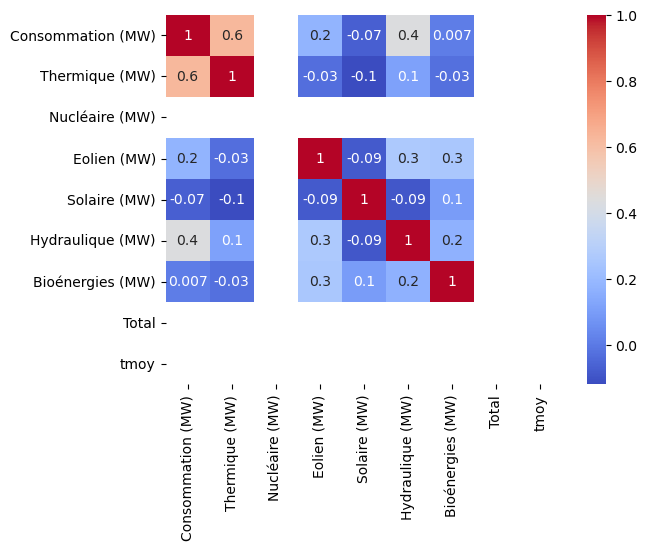

In [52]:
sns.heatmap(data_Final[data_Final["region"]=='Pays de la Loire'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Provence-Alpes-Côte d'Azur

<Axes: >

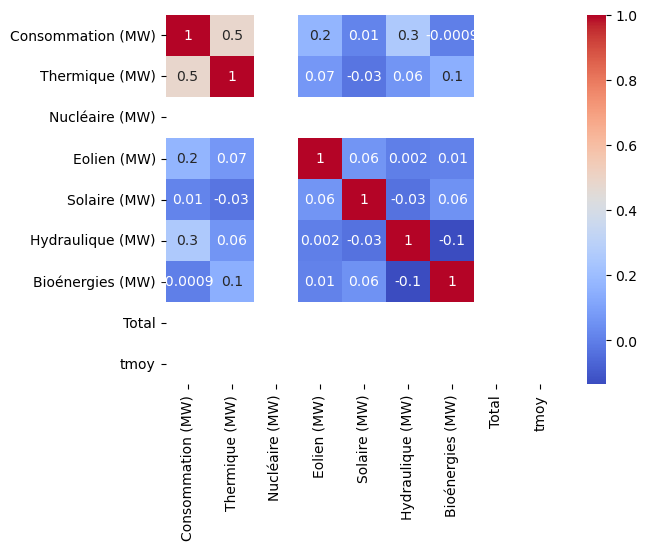

In [56]:
sns.heatmap(data_Final[data_Final["region"]=="Provence-Alpes-Côte d'Azur"].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

## Île-de-France

<Axes: >

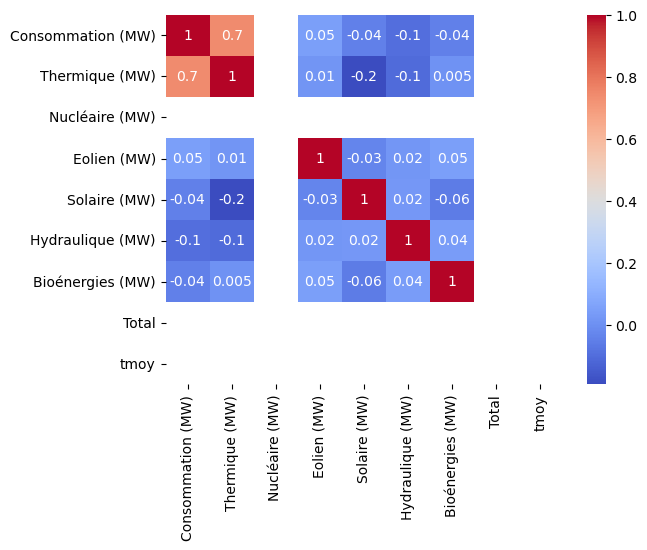

In [62]:
sns.heatmap(data_Final[data_Final["region"]=='Île-de-France'].filter(items=['region', 'Date', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Bioénergies (MW)','Total', 'tmoy']).corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1g")

# Reprise sur de bonnes bases

## Conso (mw) par région

In [84]:
data_Final.groupby('region')['Consommation (MW)'].sum().sort_values()

region
Centre-Val de Loire           3.561316e+08
Bourgogne-Franche-Comté       4.027369e+08
Bretagne                      4.224615e+08
Pays de la Loire              5.103814e+08
Normandie                     5.271383e+08
Occitanie                     7.076909e+08
Provence-Alpes-Côte d'Azur    7.723512e+08
Nouvelle-Aquitaine            8.186721e+08
Grand Est                     8.583918e+08
Hauts-de-France               9.526636e+08
Auvergne-Rhône-Alpes          1.245589e+09
Île-de-France                 1.332458e+09
Name: Consommation (MW), dtype: float64

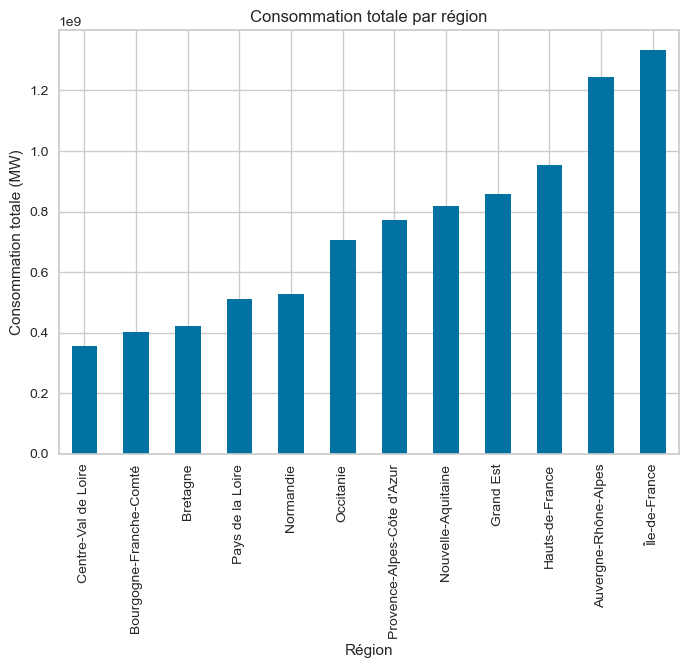

In [154]:
# Génération du graphique
ax = data_Final.groupby('region')['Consommation (MW)'].sum().sort_values().plot.bar()

# Ajout des labels et du titre
plt.xlabel("Région")
plt.ylabel("Consommation totale (MW)")
plt.title("Consommation totale par région")

# Enregistrement du graphique
plt.savefig("consommation_region_bar.png", dpi=300, bbox_inches='tight')  # Enregistrer en PNG

# Afficher le graphique (facultatif dans Jupyter)
plt.show()

<Axes: xlabel='region'>

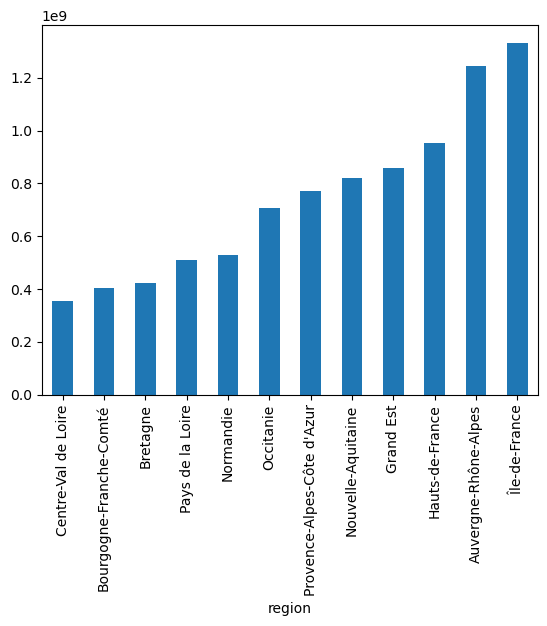

In [80]:
data_Final.groupby('region')['Consommation (MW)'].sum().sort_values().plot.bar()

Je vais regarder les densité de pop de (IDF et Auvergne)

## Pop par région

In [107]:
data_Final.groupby('region')['Total'].first()

region
Auvergne-Rhône-Alpes          8.060715e+06
Bourgogne-Franche-Comté       2.815057e+06
Bretagne                      3.369226e+06
Centre-Val de Loire           2.582894e+06
Grand Est                     5.572013e+06
Hauts-de-France               6.012374e+06
Normandie                     3.337048e+06
Nouvelle-Aquitaine            6.028944e+06
Occitanie                     5.949756e+06
Pays de la Loire              3.820795e+06
Provence-Alpes-Côte d'Azur    5.088771e+06
Île-de-France                 1.225450e+07
Name: Total, dtype: float64

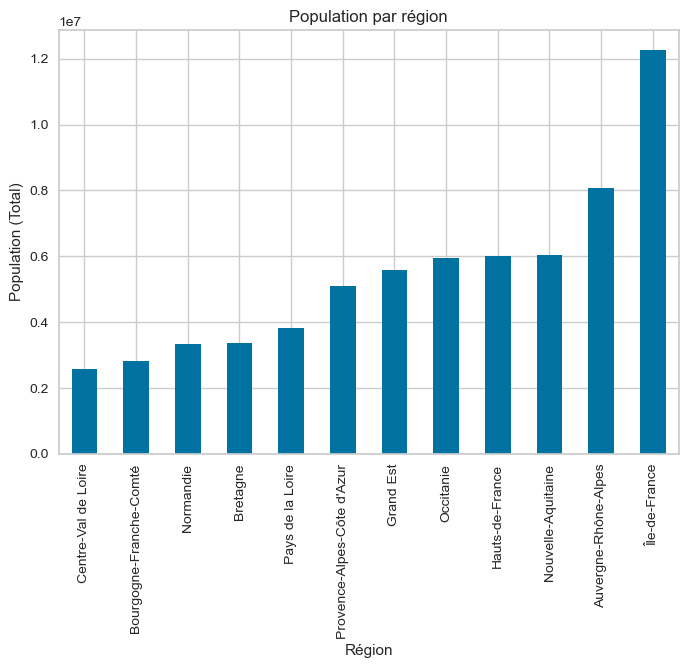

In [156]:
# Génération du graphique
ax = data_Final.groupby('region')['Total'].first().sort_values().plot.bar()

# Ajout des labels et du titre
plt.xlabel("Région")
plt.ylabel("Population (Total)")
plt.title("Population par région")

# Enregistrement du graphique
plt.savefig("population_region_bar.png", dpi=300, bbox_inches='tight')  # Enregistrer en PNG

# Affichage du graphique (facultatif)
plt.show()

<Axes: xlabel='region'>

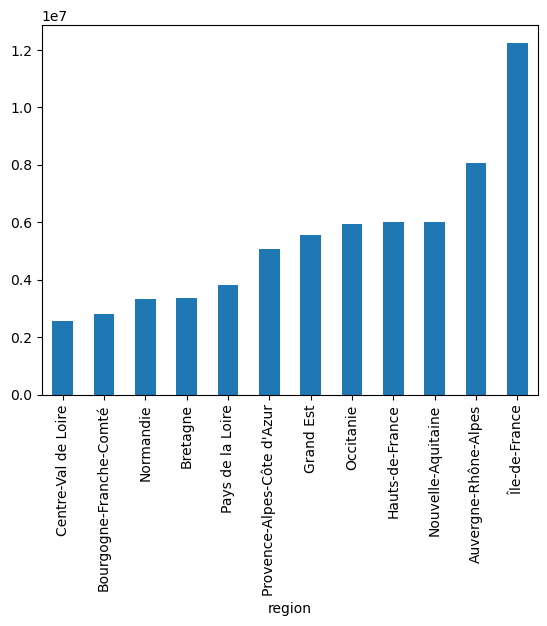

In [113]:
data_Final.groupby('region')['Total'].first().sort_values().plot.bar()

## Optimisation par source d'énergie par région

In [158]:
Opti_source_region = data_Final.groupby('region')[['TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)', 'TCO Hydraulique (%)', 'TCO Bioénergies (%)']].mean().sort_values(by='TCO Nucléaire (%)')
Opti_source_region

TCO Nucléaire (%)  TCO Eolien (%)  \
region                                                          
Île-de-France                        0.218999        0.255607   
Bretagne                             1.238456        6.327760   
Bourgogne-Franche-Comté              1.975818        7.162142   
Pays de la Loire                     2.927237        4.662776   
Provence-Alpes-Côte d'Azur           5.071811       10.089542   
Occitanie                           26.042337       17.665922   
Hauts-de-France                     36.046707       12.180179   
Nouvelle-Aquitaine                  47.986632        7.237705   
Auvergne-Rhône-Alpes                65.927808       21.350144   
Grand Est                           72.332775       19.409296   
Normandie                           83.825031        3.965399   
Centre-Val de Loire                187.478837        8.767217   

                            TCO Solaire (%)  TCO Hydraulique (%)  \
region                                                             
Île-de-France                      1.025669             0.077906   
Bretagne                           1.711388             2.983753   
Bourgogne-Franche-Comté            2.154872             3.436744   
Pays de la Loire                   2.502589             0.084389   
Provence-Alpes-Côte d'Azur         3.886580            26.717214   
Occitanie                          5.296694            32.608942   
Hauts-de-France                    1.235246             0.030141   
Nouvelle-Aquitaine                 6.598477             8.685394   
Auvergne-Rhône-Alpes               2.111215            46.555196   
Grand Est                          2.354349            18.437958   
Normandie                          1.626367             0.454556   
Centre-Val de Loire                3.089100             0.613596   

                            TCO Bioénergies (%)  
region                                           
Île-de-France                          1.939552  
Bretagne                               2.142819  
Bourgogne-Franche-Comté                1.965275  
Pays de la Loire                       1.960851  
Provence-Alpes-Côte d'Azur             2.400692  
Occitanie                              2.010747  
Hauts-de-France                        2.284387  
Nouvelle-Aquitaine                     3.807446  
Auvergne-Rhône-Alpes                   1.709269  
Grand Est                              2.640159  
Normandie                              2.174160  
Centre-Val de Loire                    3.086397

In [194]:
# Calculer Q1 et Q3 pour chaque colonne de TCO
tco_columns = ['TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)', 
               'TCO Hydraulique (%)', 'TCO Bioénergies (%)']

seuils = data_Final[tco_columns].quantile([0.25, 0.75]).transpose()
seuils.columns = ['Q1', 'Q3']
print(seuils)

                       Q1     Q3
TCO Nucléaire (%)    0.00  87.49
TCO Eolien (%)       0.36  14.46
TCO Solaire (%)      0.03   2.63
TCO Hydraulique (%)  0.12  18.37
TCO Bioénergies (%)  1.74   2.74


In [220]:
# Calcul des seuils Q1 et Q3 pour chaque colonne
"""seuils = data_Final[['TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)', 
                     'TCO Hydraulique (%)', 'TCO Bioénergies (%)']].quantile([0.25, 0.75]).transpose()
seuils.columns = ['Q1', 'Q3']"""

# Moyennes par région
Opti_source_region_filtrer = data_Final.groupby('region')[['TCO Nucléaire (%)', 'TCO Eolien (%)', 
                                                    'TCO Solaire (%)', 'TCO Hydraulique (%)', 
                                                    'TCO Bioénergies (%)']].mean()

# Appliquer les catégories en indexation conditionnelle
for col in Opti_source_region_filtrer.columns:
    q1, q3 = seuils.loc[col, 'Q1'], seuils.loc[col, 'Q3']
    
    # Modifier directement la colonne avec des valeurs catégoriques
    Opti_source_region_filtrer[col] = pd.cut(
        Opti_source_region_filtrer[col],
        bins=[-float('inf'), q1, q3, float('inf')],  # Définir les bornes des catégories
        labels=['Sous-utilisé', 'Optimisé', 'Non optimisé']  # Assigner les labels
    )


Opti_source_region_filtrer = Opti_source_region_filtrer.sort_values(by='TCO Nucléaire (%)')
print(Opti_source_region_filtrer)

                           TCO Nucléaire (%) TCO Eolien (%) TCO Solaire (%)  \
region                                                                        
Auvergne-Rhône-Alpes                Optimisé   Non optimisé        Optimisé   
Bourgogne-Franche-Comté             Optimisé       Optimisé        Optimisé   
Bretagne                            Optimisé       Optimisé        Optimisé   
Grand Est                           Optimisé   Non optimisé        Optimisé   
Hauts-de-France                     Optimisé       Optimisé        Optimisé   
Normandie                           Optimisé       Optimisé        Optimisé   
Nouvelle-Aquitaine                  Optimisé       Optimisé    Non optimisé   
Occitanie                           Optimisé   Non optimisé    Non optimisé   
Pays de la Loire                    Optimisé       Optimisé        Optimisé   
Provence-Alpes-Côte d'Azur          Optimisé       Optimisé    Non optimisé   
Île-de-France                       Optimisé   Sous-

In [1]:
#plt.savefig('nom_du_fichier.png', dpi=300, bbox_inches='tight')  # Enregistrement en PNG